In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from codebase import utils as ut
from codebase.models.vae import VAE
from codebase.models.gmvae import GMVAE
import torchvision.utils as tvut


In [2]:
vae = VAE(nn='v1', name='model=vae_z=10_run=0000', z_dim=10)
#ut.load_model_by_name(vae,20000)
file_path = os.path.join('checkpoints',
                             'model=vae_z=10_run=0000',
                             'model-20000.pt')
state = torch.load(file_path)
vae.load_state_dict(state)

In [3]:
gmvae = GMVAE(nn='v1', name='model=gmvae_z=10_k=500_run=0000', z_dim = 10)
file_path = os.path.join('checkpoints',
                             'model=gmvae_z=10_k=500_run=0000',
                             'model-20000.pt')
state = torch.load(file_path)
gmvae.load_state_dict(state)


In [9]:
tvut.save_image(vae.sample_x(200).reshape(200, 1, 28, 28), '/Users/DivyanshuMurli1/Desktop/pic.png', 20)

In [11]:
samples = vae.sample_x(200)
samples = samples.numpy()
samples = samples.reshape(200,28,28)
samples = samples.reshape(10,20,28,28)

samples_tiled = np.zeros((280,560))

#samples_tiled[0:28,0:28] = samples[0]

for i in range(10):
    for j in range(20):
        samples_tiled[28*i:28*(i+1),28*j:28*(j+1)] = samples[i][j]

In [12]:
samples_gmvae = gmvae.sample_x(200)
samples_gmvae = samples_gmvae.numpy()
samples_gmvae = samples_gmvae.reshape(200,28,28)
samples_gmvae = samples_gmvae.reshape(10,20,28,28)

samples_tiled_gmvae = np.zeros((280,560))

for i in range(10):
    for j in range(20):
        samples_tiled_gmvae[28*i:28*(i+1),28*j:28*(j+1)] = samples_gmvae[i][j]

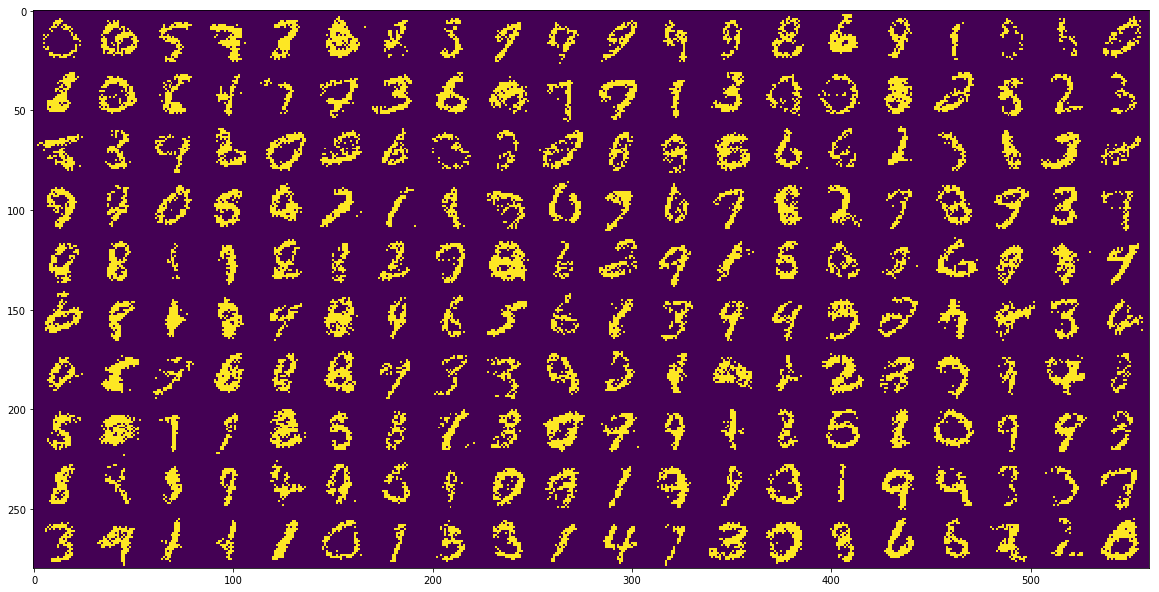

In [13]:
#VAE
plt.figure(figsize=(20,20))
plt.imshow(samples_tiled)

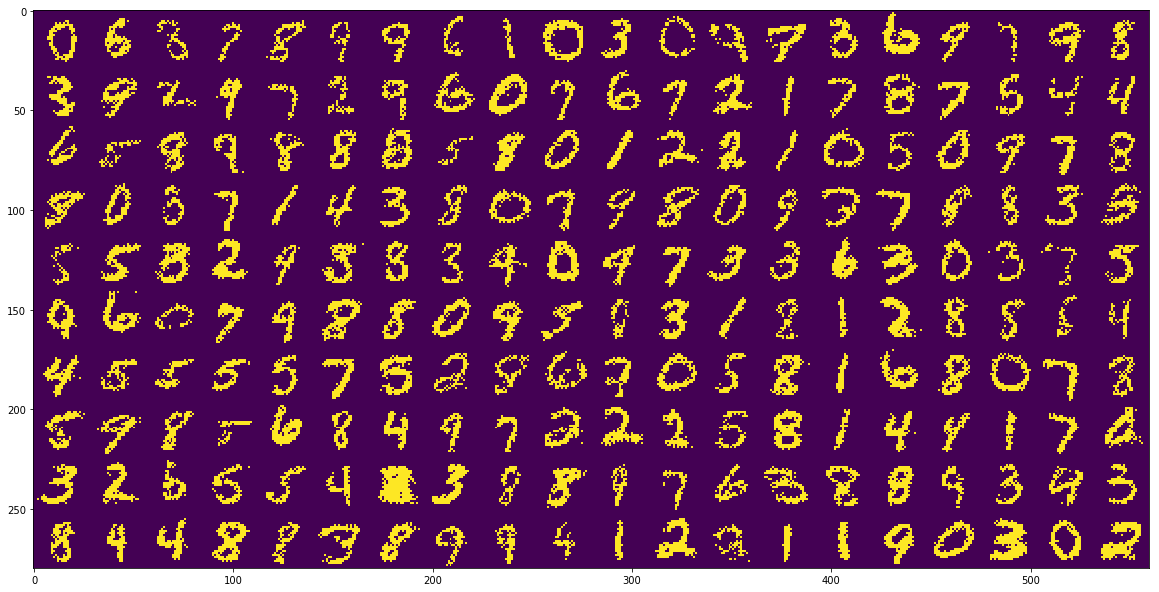

In [14]:
#GMVAE
plt.figure(figsize=(20,20))
plt.imshow(samples_tiled_gmvae)